## Practical Statistics

### Inferential Statistics

#### Bootstraping and confidence intervals

First let's read in the necessary libraries and the dataset. You also have the full and reduced versions of the data available. The reduced version is an example of you would actually get in practice, as it is the sample. While the full data is an example of everyone in your population.

In [ ]:
import pandas as pd
import numpy as np

np.random.seed(42)

coffee_full = pd.read_csv('coffee_dataset.csv')
coffee_red = coffee_full.sample(200) #this is the only data you might actually get in the real world.

coffee_red['drinks_coffee'].mean() # Drink Coffee
1 - coffee_red['drinks_coffee'].mean() # Don't Drink Coffee

coffee_red[coffee_red['drinks_coffee'] == False]['height'].mean() # Of the individuals who do not drink coffee, what is the average height?

bootsamp = coffee_red.sample(200, replace = True) # Simulate 200 "new" individuals from your original sample of 200.

# simulate your bootstrap sample 10,000 times and take the mean height of the 
# non-coffee drinkers in each sample. Plot the distribution.

boot_means = []
for _ in range(10000):
    bootsamp = coffee_red.sample(200, replace = True)
    boot_mean = bootsamp[bootsamp['drinks_coffee'] == False]['height'].mean()
    boot_means.append(boot_mean)
    
plt.hist(boot_means); # Looks pretty normal

np.percentile(boot_means, 2.5), np.percentile(boot_means, 97.5) # pull the values necessary for a 95% confidence interval

We are 95% confident that the proportion of users that click through using Page A is higher than the average using Page B

We are 95% confident that on average the drug will work for the members of this specific population

#### A/B Tests

Let's recap the steps we took to analyze the results of this A/B test.

1. We computed the observed difference between the metric, click through rate, for the control and experiment group.
2. We simulated the sampling distribution for the difference in proportions (or difference in click through rates).
3. We used this sampling distribution to simulate the distribution under the null hypothesis, by creating a random normal distribution centered at 0 with the same spread and size.
4. We computed the p-value by finding the proportion of values in the null distribution that were greater than our observed difference.
5. We used this p-value to determine the statistical significance of our observed difference

In [ ]:
# Pegar na pasta

The second change Audacity is A/B testing is a more career focused description on a course overview page. They hope that this change may encourage more users to enroll and complete this course. In this experiment, we’re going to analyze the following metrics:

* Enrollment Rate: Click through rate for the Enroll button the course overview page
* Average Reading Duration: Average number of seconds spent on the course overview page
* Average Classroom Time: Average number of days spent in the classroom for students enrolled in the course
* Completion Rate: Course completion rate for students enrolled in the course

First, let's determine if the difference observed for each metric is statistically significant individually.



In [ ]:
# Pegar na pasta

### Probability

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

# outcome of one coin flip 
np.random.randint(low=0, high=2, size=None)

# outcomes of ten thousand coin flips
np.random.randint(2, size=10000)

# mean outcome of ten thousand coin flips
np.random.randint(2, size=10000).mean()

# outcome of one coin flip
np.random.choice([0, 1])

# outcome of ten thousand coin flips
np.random.choice([0, 1], size=10000)

# mean outcome of ten thousand coin flips
np.random.choice([0, 1], size=10000).mean()

# outcomes of ten thousand biased coin flips
np.random.choice([0, 1], size=10000, p=[0.8, 0.2])

# mean outcome of ten thousand biased coin flips
np.random.choice([0, 1], size=10000, p=[0.8, 0.2]).mean()

0.20177

In [ ]:
# simulate 1 million tests of two fair coin flips
tests = np.random.randint(2, size=(int(1e6), 2))

# sums of all tests
test_sums = tests.sum(axis=1)

# proportion of tests that produced exactly two heads
(test_sums == 0).mean()

# simulate 1 million tests of three fair coin flips
tests = np.random.randint(2, size=(int(1e6), 3))

# sums of all tests
test_sums = tests.sum(axis=1)

# proportion of tests that produced exactly one head
(test_sums == 2).mean()

# simulate 1 million tests of three biased coin flips
# hint: use np.random.choice()
tests = np.random.choice([0, 1], size=(int(1e6), 3), p=[0.6, 0.4])

# sums of all tests
test_sums = tests.sum(axis=1)

# proportion of tests that produced exactly one head
(test_sums == 2).mean()

# simulate 1 million tests of one die roll
tests = np.random.choice(np.arange(1, 7), size=(int(1e6), 1))

# proportion of tests that produced an even number
(tests%2 == 0).mean()

# simulate the first million die rolls
first = np.random.choice(np.arange(1, 7), size=(int(1e6), 1))

# simulate the second million die rolls
second = np.random.choice(np.arange(1, 7), size=(int(1e6), 1))

# proportion of tests where the 1st and 2nd die rolled the same number
(first == second).mean()

0.249943

You found the following proportions from the cancer results dataset.

Patients with cancer: 0.105
Patients without cancer: 0.895
Patients with cancer who tested positive: 0.905
Patients with cancer who tested negative: 0.095
Patients without cancer who tested positive: 0.204
Patients without cancer who tested negative: 0.796
Based on the above proportions observed in the data, we can assume the following probabilities.

In [ ]:
# load dataset
import pandas as pd

df = pd.read_csv('cancer_test_data.csv')
df.head()

# What proportion of patients who tested positive has cancer?
df.query('test_result == "Positive"')['has_cancer'].mean()

# What proportion of patients who tested positive doesn't have cancer?
1 - df.query('test_result == "Positive"')['has_cancer'].mean()

# What proportion of patients who tested negative has cancer?
df.query('test_result == "Negative"')['has_cancer'].mean()

# What proportion of patients who tested negative doesn't have cancer?
1 - df.query('test_result == "Negative"')['has_cancer'].mean()

#### Binomial Distribution

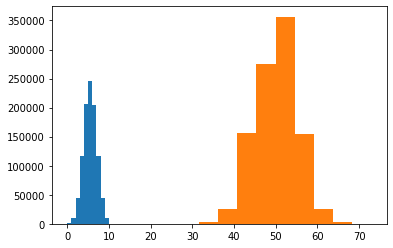

In [ ]:
import numpy as np

# number of heads from 10 fair coin flips
np.random.binomial(10, 0.5)

# results from 20 tests with 10 coin flips
np.random.binomial(10, 0.5, 20)

# mean number of heads from the 20 tests
np.random.binomial(10, 0.5, 20).mean()

# reflects the fairness of the coin more closely as # tests increases
np.random.binomial(10, 0.5, 1000000).mean()

import matplotlib.pyplot as plt
% matplotlib inline

plt.hist(np.random.binomial(10, 0.5, 1000000));

# gets more narrow as number of flips increase per test
plt.hist(np.random.binomial(100, 0.5, 1000000));

In [ ]:
# simulate 1 million tests of one fair coin flip
# remember, the output of these tests are the # successes, or # heads
tests = np.random.binomial(1, 0.5, int(1e6))

# proportion of tests that produced heads
(tests == 1).mean()

# simulate 1 million tests of five fair coin flips
tests = np.random.binomial(5, 0.5, int(1e6))

# proportion of tests that produced 1 head
(tests == 1).mean()

# simulate 1 million tests of five biased coin flips with P(H) = 0.8
tests = np.random.binomial(5, 0.8, int(1e6))

# proportion of tests that produced 5 heads
(tests == 5).mean()

#### Sampling Distribution

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)

students = np.array([1,0,1,1,1,1,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0])

students.mean()

p = students.mean()

sample1 = np.random.choice(students, 5, replace=True)
sample1.mean()

sample_props = []
for _ in range(10000):
    sample = np.random.choice(students, 5, replace=True)
    sample_props.append(sample.mean())

sample_props = np.array(sample_props)
sample_props.mean()

print('The standard deviation for the original data is {}'.format(students.std()))
print('The variance for the original data is {}'.format(students.var()))

p*(1-p) # The variance of the original data

print('The standard deviation of the sampling distribution of the mean of 5 draws is {}'.format(sample_props.std()))
print('The variance for the sampling distribution of the mean of 5 draws is {}'.format(sample_props.var()))

p*(1-p)/5 # The variance of the sample mean of size 5

## A/B Tests

### Study Case

1. __Scenario Description__: 

Let's say that you're working for a fictional productivity software company that is looking for ways to increase the number of people who pay for their software. The way that the software is currently set up, users can download and use the software free of charge, for a 7-day trial. After the end of the trial, users are required to pay for a license to continue using the software.

One idea that the company wants to try is to change the layout of the homepage to emphasize more prominently and higher up on the page that there is a 7-day trial available for the company's software. The current fear is that some potential users are missing out on using the software because of a lack of awareness of the trial period. If more people download the software and use it in the trial period, the hope is that this entices more people to make a purchase after seeing what the software can do.

In this case study, you'll go through steps for planning out an experiment to test the new homepage. You will start by constructing a user funnel and deciding on metrics to track. You'll also perform experiment sizing to see how long it should be run. Afterwards, you'll be given some data collected for the experiment, perform statistical tests to analyze the results, and come to conclusions regarding how effective the new homepage changes were for bringing in more users.

2. __Building a funnel__: 

Before we do anything else, the first thing we should do is specify the objective or goal of our study:

> _Revising the structure of the homepage will increase the number of people that download the software and, ultimately, the number of people that purchase a license._

Now, we should think about the activities that a user will take on the site that are relevant to measuring our objective. This path or funnel will help us figure out how we will create experimental condition groups and which metrics we'll need to track to measure the experiment's effect. To help you construct the funnel, here's some information about the way the company's website is structured, and how the software induces users to purchase a license.

The company's website has five main sections:

* the homepage;
* a section with additional information, gallery, and examples;
* a page for users to download the software;
* a page for users to purchase a license; and
* a support sub-site with documentation and FAQs for the software.

For the software itself, the website requires that users create an account in order to download the software program. The program is usable freely for seven days after download. When the trial period is hit, the program will bring up a dialog box that takes the user to the license page. After purchasing a license, the user will receive a unique code associated with their site account. This code can then be used with the program to register it with that user, and the program can be used thereafter without issue.

Using the information above, fill in your responses to the questions below regarding the construction of a user funnel, then check on the next page for my thoughts.

3. __Expected Flow__

A straightforward flow might include the following steps:

* Visit homepage
* Visit download page
* Sign up for an account
* Download software
* After 7-day trial, software takes user to license-purchase page
* Purchase license

Note that it is possible for the visitor to drop from the flow after each step, forming a funnel. There might be additional steps that a user might take between visiting the homepage and visiting the download page that aren't accounted for in the above flow. For example, someone might want to check out the additional informational pages before visiting the download page, or even visit the license purchase page to check the license price before even deciding to download. Considering the amount of browsing that a visitor could perform on the page, it might be simplest just to track whether or not a user gets to the download page at some point, without worrying about the many paths that they could have taken to get there.

4. __Atypical events__

There are a few events in the expected flow that might not correspond with the visitors we want to target. For example, there might be users on the homepage who aren't new users. Users who already have a license might just be visiting the homepage as a way to access the support sub-site. A user who wants to buy a license might also come in to the license page through the homepage, rather than directly from the software.

When it comes to license purchasing, it's possible that users don't come back after exactly seven days. Some users might come back early and make their purchase during their trial period. Alternatively, a user might end up taking more than seven days to decide to make their purchase, coming back days after the end of the trial. Anticipating scenarios like this can be useful for planning the design, and coming up with metrics that come as close as possible to measuring desired effects.

5. __Deciding on Metrics__

From our user funnel, we should consider two things: where and how we should split users into experiment groups, and what metrics we will use to track the success or failure of the experimental manipulation. The choice of unit of diversion (the point at which we divide observations into groups) may affect what metrics we can use, and whether the metrics we record should be considered invariant or evaluation metrics. To start, decide on a unit of diversion and brainstorm some ideas for metrics to capture.

To be clear, the overall plan is to test the effect of the new homepage using a true experiment; in particular, we'll be using an A/B testing framework. This means that prospective users should be split into two groups. The control, or 'A' group, will see the old homepage, while the experimental, or 'B' group, will see the new homepage that emphasizes the 7-day trial.

6. __Unit of Diversion__

hree main categories of diversion were presented in the course: event-based diversion, cookie-based diversion, and account-based diversion.

An event-based diversion (like a pageview) can provide many observations to draw conclusions from, but doesn't quite hit the mark for this case. If the condition changes on each pageview, then a visitor might get a different experience on each homepage visit. Event-based diversion is much better when the changes aren't as easily visible to users, to avoid disruption of experience. In addition, pageview-based diversion would let us know how many times the download page was accessed from each condition, but can't go any further in tracking how many actual downloads were generated from each condition.

Diverting based on account or user ID can be stable, but it's not the right choice in this case. Since visitors only register after getting to the download page, this is too late to introduce the new homepage to people who should be assigned to the experimental condition.

So this leaves the consideration of cookie-based diversion, which feels like the right choice. We can assign a cookie to each visitor upon their first page hit, which allows them to be separated into the control and experimental groups. Cookies also allow tracking of each visitor hitting each page, recording whether or not they eventually hit the download page and then whether or not they actually register an account and perform the download.

That's not to say that the cookie-based diversion is perfect. The usual cookie-based diversion issues apply: we can get some inconsistency in counts if users enter the site via incognito window, different browsers, or cookies that expire or get deleted before they make a download. This kind of assignment 'dilution' could dampen the true effect of our experimental manipulation. As a simplification, however, we'll assume that this kind of assignment dilution will be small, and ignore its potential effects.

### Experiment Sizing

The basics in sample size determination for A/B Tests

* Baseline conversion rate: the approximate percent of the population that satisfies the hypothesis.
* Statistical significance: the probability of the study rejecting the null hypothesis, given that the null hypothesis was assumed to be true.
* Minimum detectable effect: the lift is the minimum difference between the  A and B samples we want to be able to detect.
* The confident level: How confident we need to be.

In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

def power(p_null, p_alt, n, alpha, plot):
    """
    Compute the power of detecting the difference in two populations with 
    different proportion parameters, given a desired alpha rate.
    
    Input parameters:
        p_null: base success rate under null hypothesis
        p_alt : desired success rate to be detected, must be larger than
                p_null
        n     : number of observations made in each group
        alpha : Type-I error rate
        plot  : boolean for whether or not a plot of distributions will be
                created
    
    Output value:
        power : Power to detect the desired difference, under the null.
    """
    
    # Compute the power
    
    # compute standard deviation
    se_null = np.sqrt((p_null * (1-p_null) + p_null * (1-p_null)) / n)
    # create the distribution
    null_dist = stats.norm(loc=0, scale=se_null)
    # compute critical value
    p_crit = null_dist.ppf(1- alpha)

    se_alt = np.sqrt((p_null * (1-p_null) + p_alt * (1-p_alt) ) /n)
    alt_dist = stats.norm(loc=p_alt - p_null, scale=se_alt)
    beta = alt_dist.cdf(p_crit)
    
    if plot:
        # Compute distribution heights
        low_bound = null_dist.ppf(.01)
        high_bound = alt_dist.ppf(.99)
        x = np.linspace(low_bound, high_bound, 201)
        y_null = null_dist.pdf(x)
        y_alt = alt_dist.pdf(x)

        # Plot the distributions
        plt.plot(x, y_null)
        plt.plot(x, y_alt)
        plt.vlines(p_crit, 0, np.amax([null_dist.pdf(p_crit), alt_dist.pdf(p_crit)]),
                   linestyles = '--')
        plt.fill_between(x, y_null, 0, where = (x >= p_crit), alpha = .5)
        plt.fill_between(x, y_alt , 0, where = (x <= p_crit), alpha = .5)
        
        plt.legend(['null','alt'])
        plt.xlabel('difference')
        plt.ylabel('density')
        plt.show()
    
    # return power
    return (1 - beta)

In [ ]:
p_null = .02
p_alt = .023
alpha = .025
plot = False
max_n = 40000

for n in range(10000, max_n):
    p = power(p_null, p_alt, n, alpha, plot)
    if (np.isclose(p, 0.8, atol = 1e-4)) == True:
        print(n, '   ', p)
    elif n == (max_n - 1):
        print(n, '   ', p)

In [ ]:
34930/1625

21.495384615384616

### Analyze Data

Let's assume that the experiment was given the green light to go ahead, and data was collected for 29 days. As a reminder of the discussion on experiment sizing, it was found that a three-week period was needed to collect enough visitors to achieve our desired power level. Eight additional days of collection were added to allow visitors in the last week to complete their trials and come back to make a purchase – if you look at the data linked in the next paragraph, you will see that it takes about eight days before the license purchases reaches its steady level.

The collected data can be found here. The data file reports the daily counts for the number of unique cookies, number of downloads, and number of license purchases attributed to each group: the experimental group with the new homepage, or the control group with the old homepage. The number of license purchases only includes purchases by users who joined after the start of the experiment, so there will be some time before the counts reach their steady state. As noted earlier, we'll assume that the potentially muddying effects of visits across multiple days, established user visits, and 'lost' cookie tracking will be ignorable, at least unless we find reason to doubt our findings.

### Invariant Metric

First, we should check our invariant metric, the number of cookies assigned to each group. If there is a statistically significant difference detected, then we shouldn't move on to the evaluation metrics right away. We'd need to first dig deeper to see if there was an issue with the group-assignment procedure, or if there is something about the manipulation that affected the number of cookies observed, before we feel secure about analyzing and interpreting the evaluation metrics.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv('data.csv')
df.head()

,Day,Control Cookies,Control Downloads,Control Licenses,Experiment Cookies,Experiment Downloads,Experiment Licenses
0,1,1764,246,1,1850,339,3
1,2,1541,234,2,1590,281,2
2,3,1457,240,1,1515,274,1
3,4,1587,224,1,1541,284,2
4,5,1606,253,2,1643,292,3


In [ ]:
# Get dataframe from control group
control_df = pd.DataFrame(df.sum()[1:4].values, index=df.sum()[1:4].index, columns=['Summary'])

# Get Control Cookies
control_co = control_df.loc['Control Cookies'][0]

# Get Control Downloads
control_do = control_df.loc['Control Downloads'][0]

# Get Control Licenses
control_li = control_df.loc['Control Downloads'][0]

control_df.head()

,Summary
Control Cookies,46851
Control Downloads,7554
Control Licenses,710


In [ ]:
# Get dataframe from experiment group
experiment_df = pd.DataFrame(df.sum()[4:7].values, index=df.sum()[4:7].index, columns=['Summary'])

# Get Experiment Cookies
experiment_co = experiment_df.loc['Experiment Cookies'][0]

# Get Experiment Downloads
experiment_do = experiment_df.loc['Experiment Downloads'][0]

# Get Experiment Licenses
experiment_li = experiment_df.loc['Experiment Downloads'][0]

experiment_df.head()

,Summary
Experiment Cookies,47346
Experiment Downloads,8548
Experiment Licenses,732


Analyze only invariant metric

Simulation approach

In [ ]:
# Compute observed difference in cookies
obs_diff = experiment_co - control_co

# Display observed difference in cookies
obs_diff

495

In [ ]:
# Create sampling distribution for difference in completion rates
# with boostrapping
diffs = []
size = df.shape[0]
for _ in range(20000):
    b_samp = df.sample(size, replace=True)
    control_df = pd.DataFrame(b_samp.sum()[1:4].values, index=b_samp.sum()[1:4].index, columns=['Summary'])
    experiment_df = pd.DataFrame(b_samp.sum()[4:7].values, index=b_samp.sum()[4:7].index, columns=['Summary'])
    ctrl_co = control_df.loc['Control Cookies'][0]
    exp_co = experiment_df.loc['Experiment Cookies'][0]
    diffs.append(exp_co - ctrl_co)

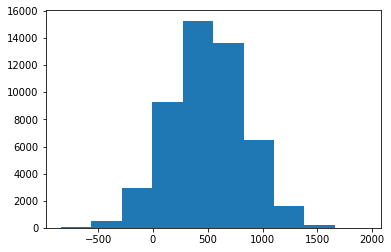

In [ ]:
# convert to numpy array
diffs = np.array(diffs)

# plot distribution
plt.hist(diffs);

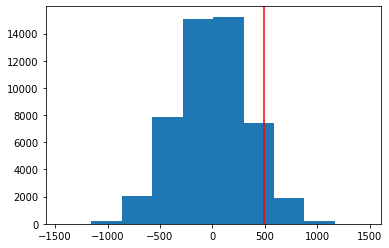

In [ ]:
# create distribution under the null hypothesis
null_vals = np.random.normal(0, diffs.std(), diffs.size)

# plot null distribution
plt.hist(null_vals)

# plot line for observed statistic
plt.axvline(obs_diff,  c='red')

In [ ]:
# for a two sided hypothesis, we want to look at anything 
# more extreme from the null in both directions
null_diff = 0

proportion = (null_vals >= obs_diff).mean()
p_val = 2*min(proportion , 1-proportion)

print(proportion)
print(p_val)

0.07248
0.14496


Analytical Approach - Considering a Binomial Distribution

In [ ]:
import scipy.stats as stats
from statsmodels.stats import proportion as proptests

# get number of trials and number of 'successes'
n_obs = experiment_co + control_co
n_control = control_co

In [ ]:
# Compute a z-score and p-value
p = 0.5
sd = np.sqrt(p * (1-p) * n_obs)

z = ((n_control + 0.5) - p * n_obs) / sd

print(z)
print(2 * stats.norm.cdf(z))

-1.6095646049678511
0.10749294050130412


Simulation Approach - Considering a Binomial Distribution

In [ ]:
import scipy.stats as stats
from statsmodels.stats import proportion as proptests

# get number of trials and number of 'successes'
n_obs = experiment_co + control_co
n_control = control_co

In [ ]:
# # simulate outcomes under null, compare to observed outcome
p = 0.5
n_trials = 10_000_000

samples = np.random.binomial(n_obs, p, n_trials)

print(np.logical_or(samples <= n_control, samples >= (n_obs - n_control)).mean())

# Can use n_control or n_experiment (lead to the same result)

0.1075741


Simulation Approach - Considering a normal approximation (Central Limit)

In [ ]:
# get number of trials and overall 'success' rate under null
n_control = control_co
n_exper = experiment_co
p_null = 0.5

# Null Hypothesis
null_diff = 0

obs_diff = n_exper - n_control

[469 330 157 ... 341 337 498] <class 'numpy.ndarray'> 

46851 <class 'numpy.int64'> 

94197 <class 'numpy.int64'> 

46851 <class 'numpy.int64'> 

0.0536725
0.107345


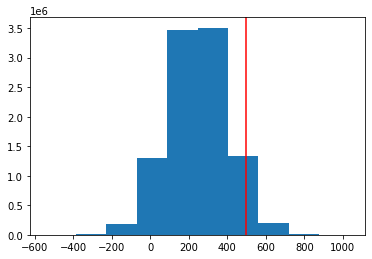

In [ ]:
# simulate outcomes under null, compare to observed outcome
n_trials = 10_000_000

ctrl_co = np.random.binomial(n_control, p_null, n_trials)
exp_co = np.random.binomial(n_exper, p_null, n_trials)
null_vals = exp_co - ctrl_co

# plot null distribution
plt.hist(null_vals)

# plot line for observed statistic
plt.axvline(obs_diff,  c='red')

print(null_vals, type(null_vals), '\n')
print(n_control, type(n_control), '\n')
print(n_obs, type(n_obs), '\n')
print(n_control, type(n_control), '\n')

proportion = (null_vals >= obs_diff).mean()
p_val = 2*min(proportion , 1-proportion)

print(proportion)
print(p_val)